<h1> A. MLP </h1>
<p> We will Implement a MultiLayer Perceptron (MLP) from scratch.
Which is a type of artificial neural network used for classification and regression tasks. 

For MLP to work, it needs:</p>

 - Input Layer: This is where the data goes in.
 - Hidden Layers: These are the layers where the magic happens. The network processes the input data and starts to learn patterns. Each layer takes the output of the previous layer and transforms it further.
 - Output Layer: This layer gives the final answer.

in our case : 
- 1 input layer (x) with 2 neurons (x0, x1)
- two hidden layers (h(0), h(1)) with 10 neurons each of them.
- 1 output layer of nerons (o) with 2 neurons (each of the two output neurons representing one class)


<h2> 1. Activation and Loss functions. </h2>

- Activation Functions:
    - For input layer: No activation function is needed here as we are just passing the input.
    - For Hidden layer: We will use Rectified Linear Unit (ReLU) as its a good choice since it helps with the vanishing gradient problem that might occur and is computationally efficient.
    - For Output layer: We will choose Softmax as it converts the outputs into probabilities and also work well with Cross-Entropy Loss it also ensures that one class dominates (has the highest probability), making the decision straightforward.

- Loss Functions:
<p> we will choose Cross-Entropy Loss as It measures the difference between predicted probabilities and the true labels. which is the Ideal option for our classification task</p>


<h2> 2. Learning rate, batch size, initialization </h2>

- Learning Rate: the value chosen is 0.10.1 because its common and its considered moderate learning rate which will ensure the model converges efficiently without overshooting the optimal weights.

- Batch Size: the value chosen is Full-batch Gradient Descent (all data used at once per epoch), we will use it for simplicity and since datasets are small (410 training samples), full-batch ensures stable gradient updates.
    - if the dataset was larger we could use something like 32, 64 or 256 but because its small we are using 410 in which  Batch Size = Total Number of Training Samples = 410 [ results will be less noisy ]


- Initialization: the method Used is Xavier Initialization, since it ensures weights are neither too small nor too large, keeping gradients stable during training and it balances the variance of inputs and outputs for each layer.       


<h2> 3. Training </h2>

- Loss Plots:
      Training and validation loss curves were plotted to monitor performance.
      Loss decreased over epochs, showing the model is learning effectively.

- Stopping Criterion: Manual Stopping; training was stopped after 2000 epochs.
  Loss converged, with minimal difference between training and validation loss, indicating no overfitting.

- Final Accuracy: Accuracy can be computed from the validation dataset predictions, provided after section 4

<h2> 4. Implementation </h2>

- Make sure excel files are in the right path: have a look at variables train_data & validate_data
- You will need to run this command to install openpyxl which is needed for our implementation: ``conda install -c anaconda openpyxl`` or ``pip install openpyxl``

Epoch 0: Training Loss = 0.6953, Validation Loss = 0.6944
Epoch 100: Training Loss = 0.6485, Validation Loss = 0.6508
Epoch 200: Training Loss = 0.5394, Validation Loss = 0.5509
Epoch 300: Training Loss = 0.4148, Validation Loss = 0.4418
Epoch 400: Training Loss = 0.3408, Validation Loss = 0.3781
Epoch 500: Training Loss = 0.3048, Validation Loss = 0.3453
Epoch 600: Training Loss = 0.2774, Validation Loss = 0.3196
Epoch 700: Training Loss = 0.2513, Validation Loss = 0.2898
Epoch 800: Training Loss = 0.2216, Validation Loss = 0.2546
Epoch 900: Training Loss = 0.1882, Validation Loss = 0.2155
Epoch 1000: Training Loss = 0.1605, Validation Loss = 0.1788
Epoch 1100: Training Loss = 0.1435, Validation Loss = 0.1538
Epoch 1200: Training Loss = 0.1330, Validation Loss = 0.1401
Epoch 1300: Training Loss = 0.1253, Validation Loss = 0.1357
Epoch 1400: Training Loss = 0.1208, Validation Loss = 0.1322
Epoch 1500: Training Loss = 0.1184, Validation Loss = 0.1313
Epoch 1600: Training Loss = 0.1165, 

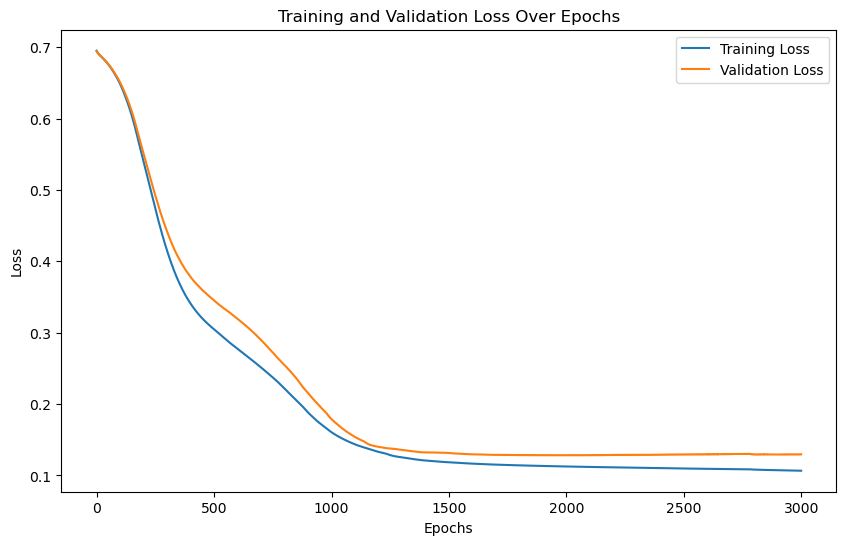

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Normalize features
def normalize_features(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# This is our Activation functions
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Here is the Xavier initialization
def xavier_initialization(input_size, hidden_layer_size, output_size):
    parameters = {
        "W1": np.random.randn(input_size, hidden_layer_size) * np.sqrt(1 / input_size),
        "b1": np.zeros((1, hidden_layer_size)),
        "W2": np.random.randn(hidden_layer_size, hidden_layer_size) * np.sqrt(1 / hidden_layer_size),
        "b2": np.zeros((1, hidden_layer_size)),
        "W3": np.random.randn(hidden_layer_size, output_size) * np.sqrt(1 / hidden_layer_size),
        "b3": np.zeros((1, output_size))
    }
    return parameters

# Def the Forward propagation
def forward_propagation_relu(X, parameters):
    Z1 = np.dot(X, parameters["W1"]) + parameters["b1"]
    A1 = relu(Z1)
    Z2 = np.dot(A1, parameters["W2"]) + parameters["b2"]
    A2 = relu(Z2)
    Z3 = np.dot(A2, parameters["W3"]) + parameters["b3"]
    A3 = softmax(Z3)
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2, "Z3": Z3, "A3": A3}
    return A3, cache

# Backward propagation that returns grads
def backward_propagation_relu(X, y_true, cache, parameters):
    m = X.shape[0]
    A3, A2, A1 = cache["A3"], cache["A2"], cache["A1"]
    Z2, Z1 = cache["Z2"], cache["Z1"]
    
    dZ3 = A3 - y_true
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m
    
    dA2 = np.dot(dZ3, parameters["W3"].T)
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    dA1 = np.dot(dZ2, parameters["W2"].T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    grads = {"dW3": dW3, "db3": db3, "dW2": dW2, "db2": db2, "dW1": dW1, "db1": db1}
    return grads

# Update parameters
def update_parameters(parameters, grads, learning_rate):
    parameters["W1"] -= learning_rate * grads["dW1"]
    parameters["b1"] -= learning_rate * grads["db1"]
    parameters["W2"] -= learning_rate * grads["dW2"]
    parameters["b2"] -= learning_rate * grads["db2"]
    parameters["W3"] -= learning_rate * grads["dW3"]
    parameters["b3"] -= learning_rate * grads["db3"]
    return parameters

# Cross-entropy loss
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    log_probs = -np.log(y_pred[range(m), y_true.argmax(axis=1)])
    loss = np.sum(log_probs) / m
    return loss

# The Training function
def train_mlp_relu(X_train, y_train, X_validate, y_validate, hidden_layer_size, learning_rate, epochs):
    parameters = xavier_initialization(X_train.shape[1], hidden_layer_size, y_train.shape[1])
    train_losses, val_losses = [], []
    
    for epoch in range(epochs):
        # Forward pass
        y_pred, cache = forward_propagation_relu(X_train, parameters)
        train_loss = compute_loss(y_train, y_pred)
        
        # Backward pass
        grads = backward_propagation_relu(X_train, y_train, cache, parameters)
        
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Validation loss
        val_pred, _ = forward_propagation_relu(X_validate, parameters)
        val_loss = compute_loss(y_validate, val_pred)
        
        # Store losses
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        # Print loss
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Training Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}")
    
    return parameters, train_losses, val_losses

# Load datasets
train_data = pd.read_excel("./THA2train.xlsx")
validate_data = pd.read_excel("./THA2validate.xlsx")

# Prepare data
X_train = normalize_features(train_data[["X_0", "X_1"]].values)
y_train = pd.get_dummies(train_data["y"]).values

X_validate = normalize_features(validate_data[["X_0", "X_1"]].values)
y_validate = pd.get_dummies(validate_data["y"]).values

# Train the model
hidden_layer_size = 10
learning_rate = 0.1
epochs = 3000

parameters, train_losses, val_losses = train_mlp_relu(
    X_train, y_train, X_validate, y_validate, 
    hidden_layer_size, learning_rate, epochs
)

# Plot training and validation losses here
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.show()


<h3>Final accuracy & the Confusion Matrix </h3>
<p>here is the final accuracy obtained and the confusion matrix on
the validation dataset.</p>

- Validation Accuracy=97.56% [which is: Total Number of Predictions / Number of Correct Predictions]

    - Validation Accuracy = (40+40) / (40+40+1+1) = 0.9756

- Confusion Matrix:
    - True Positives (TP): 40
    - True Negatives (TN): 40
    - False Positives (FP): 1
    - False Negatives (FN): 1

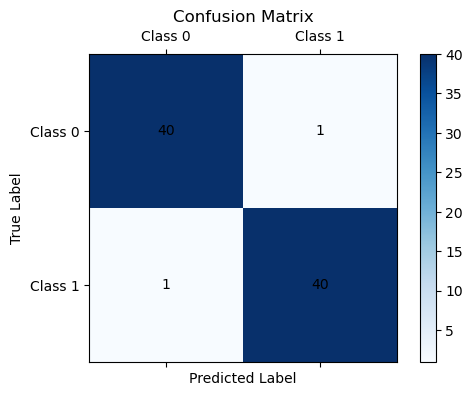

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# confusion matrix
conf_matrix = np.array([[40, 1],
                        [1, 40]])

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(6, 4))

# Display the matrix with a colormap
cax = ax.matshow(conf_matrix, cmap="Blues")
plt.colorbar(cax)

# Add text annotations for each cell
for (i, j), value in np.ndenumerate(conf_matrix):
    ax.text(j, i, f"{value}", ha="center", va="center", color="black")

# Set axis labels and ticks
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Class 0", "Class 1"])
ax.set_yticklabels(["Class 0", "Class 1"])
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.title("Confusion Matrix")

# finally
plt.show()

